In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from ds_sales_modules import SalesModelData

In [ ]:
df = SalesModelData()
df = df.get_data(period=False, translit=False)
print(f'df size: rows {len(df)} columns {len(df.columns)}')
df.head(2)

In [ ]:
df.query('created_day > "2023-08-03" and created_day < "2023-08-05"')

In [ ]:
test = df.query('created_day > "2023-08-03" and created_day < "2023-08-05"')
test.groupby(['created_day', 'agent_name']).agg({'sum':'first'}).reset_index()

In [6]:
tr = df.groupby(['order_id', 'created_day', 'created_week', 'created_month', 'created_year', 'companyType', 'created_dayofweekname']).agg({'sum': 'first'}).reset_index().copy()
tr['created_day'] = pd.to_datetime(tr['created_day'])
tr = tr.sort_values(by='created_day').reset_index(drop=True)
tr.head(10)

,order_id,created_day,created_week,created_month,created_year,companyType,created_dayofweekname,sum
0,02be79cb-86b6-11ed-0a80-0dbe00889cbd,2022-12-28,52,12,2022,individual,Wednesday,5540.0
1,1715e94e-86b2-11ed-0a80-0cd100899c37,2022-12-28,52,12,2022,individual,Wednesday,3250.0
2,111a5f5b-86b5-11ed-0a80-09160089cc8d,2022-12-28,52,12,2022,legal,Wednesday,10420.0
3,60399dcf-86b3-11ed-0a80-0040008ad8fb,2022-12-28,52,12,2022,individual,Wednesday,5650.0
4,186daf07-875c-11ed-0a80-0140009a0e33,2022-12-29,52,12,2022,individual,Thursday,6500.0
5,b9bb60c4-875e-11ed-0a80-0cd10099768e,2022-12-29,52,12,2022,individual,Thursday,6500.0
6,1dbe22c9-875f-11ed-0a80-0ec8011d5532,2022-12-29,52,12,2022,legal,Thursday,357025.0
7,f1437322-875a-11ed-0a80-0ffb00956f87,2022-12-29,52,12,2022,individual,Thursday,3400.0
8,ca7f8ab4-876a-11ed-0a80-04df011d59fa,2022-12-29,52,12,2022,legal,Thursday,352075.0
9,cf33b882-8826-11ed-0a80-0cd100ad6eb3,2022-12-30,52,12,2022,individual,Friday,3250.0


In [7]:
plot_periods = ['day', 'week', 'month']
company_type = ['individual', 'legal']

def period_revenue(df, period, company_type=None):
    if company_type:
        df = df[df.companyType == company_type]
    if period == 'day':
        return df.groupby('created_day').agg({'sum':'sum'})
    if period == 'week':
        return df.groupby(['created_year', 'created_week']).agg({'sum':'sum'})
    if period == 'month':
        return df.groupby(['created_year', 'created_month']).agg({'sum':'sum'})

In [8]:
def plot_revenue_periouds(df, plot_periods = ['day', 'week', 'month'], company_type=None):
    n_cols = len(plot_periods)
    fig, axs =  plt.subplots(ncols=n_cols, nrows=1, figsize=(26, 6))
    for i, ax in enumerate(axs):
        revenue_plot = period_revenue(df, plot_periods[i], company_type)
        if isinstance(revenue_plot.index[0], tuple):
            indexes=[f'{item[0]}-{item[1]}' for item in revenue_plot.index]
            ax.plot(indexes, revenue_plot['sum'], label=f'{plot_periods[i]}ly revenue')
            plt.sca(ax)
            plt.xticks(rotation = 90, ha='right')
            ax.set_xticks(ax.get_xticks()[::2])
            ax.legend()

        else:
            ax.plot(revenue_plot.index, revenue_plot['sum'], label=f'{plot_periods[i]}ly revenue')
            plt.sca(ax)
            plt.xticks(rotation = 45, ha='right')
            ax.legend()

    # plt.tight_layout()
    if company_type == None:
        company_type = 'all company types'
    else:
        company_type = f'{company_type} company type'
    fig.suptitle(f'Revenue for {plot_periods} and {company_type}')
    plt.plot


In [ ]:
plot_revenue_periouds(tr)

In [ ]:
plot_revenue_periouds(tr, company_type='legal')

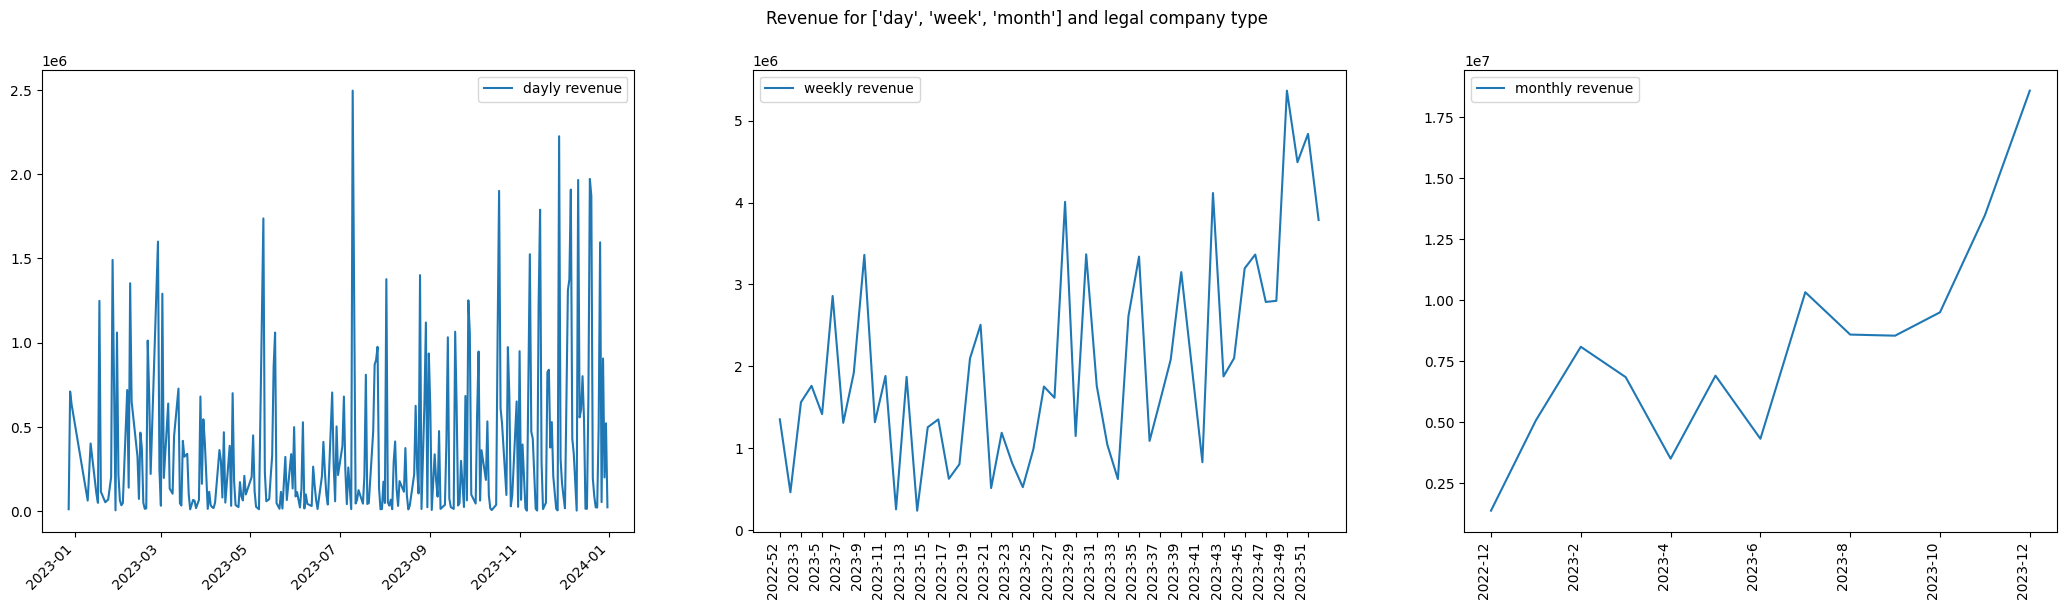

In [11]:
plot_revenue_periouds(tr.query('created_day < "2024-01-01"'), company_type='legal')

In [ ]:
plot_revenue_periouds(tr, company_type='individual')

In [ ]:
plot_revenue_periouds(tr.query('created_day < "2024-01-01"'), company_type='individual')

In [ ]:
plot_revenue_periouds(tr.query('created_day > "2023-10-01" and created_day < "2024-01-30"'), company_type='individual')

In [15]:
tr.query('created_day > "2023-08-01" and created_day < "2023-08-07"')

,order_id,created_day,created_week,created_month,created_year,companyType,created_dayofweekname,sum
1658,d5349df8-3171-11ee-0a80-02f9001476da,2023-08-02,31,8,2023,legal,Wednesday,214830.0
1659,b07de91a-3170-11ee-0a80-0ca9001577a9,2023-08-02,31,8,2023,legal,Wednesday,571335.0
1660,26a73b86-30ec-11ee-0a80-143e000b0e6b,2023-08-02,31,8,2023,individual,Wednesday,8250.0
1661,7bba4460-311c-11ee-0a80-04a3000aaeed,2023-08-02,31,8,2023,legal,Wednesday,403546.0
1662,333ec3d1-3132-11ee-0a80-0d09000eb993,2023-08-02,31,8,2023,legal,Wednesday,1100.0
...,...,...,...,...,...,...,...,...
1731,052eee86-347d-11ee-0a80-11880060238f,2023-08-06,31,8,2023,individual,Sunday,1420.0
1732,a77127a8-3442-11ee-0a80-101700572d7a,2023-08-06,31,8,2023,legal,Sunday,10700.0
1733,a9312003-346d-11ee-0a80-05de006b0dc0,2023-08-06,31,8,2023,individual,Sunday,15850.0
1734,f6e63463-343a-11ee-0a80-1188005551b4,2023-08-06,31,8,2023,individual,Sunday,6420.0


In [ ]:
tr.query('created_day > "2023-08-03" and created_day < "2023-08-05"')

In [ ]:
tr.query('created_day > "2023-08-03" and created_day < "2023-08-05"').agg({'sum':'sum'})